# Lab01: Assignment
In this assignment you're required to find whether the given numbers are prime or not using sequential and parallel processing and then compare the performance of both

## 1. Sequential processing

In [1]:
import time
import math

In [2]:
numbers = [15492781, 15492787, 15492803, 
           15492811, 15492810, 15492833, 
           15492859, 15502547, 15520301, 15527509]

In [43]:
def is_prime(number):
    """returns True if number 
    is prime, False otherwise"""
    # your code here
    #---------------------------------------------------------------------------------
    ## checking if number is an integer > 1
    if (number>1) and (isinstance(number,int)):
      ### checking for factors
      for i in range(2,number):
        if number%i==0:
          return False
      ### when no factor is found
      return True
    ## if the number is not an integer or not greater than 1 it is not a prime number
    else:
      return False
    #---------------------------------------------------------------------------------
      
    
if __name__ == "__main__":
    # your code here
    # 1. record the start time using time() function of time module     
    start = time.time()
    print(start)
    
    for number in numbers:
        # 2. print the number and 
        #    whether it is prime or not.
        #    use is_prime() function
        print(number,'\t>> ',is_prime(number))
    
    # 3. record the performance and print out
    end = time.time()
    print(end)
    t_seq = end-start
    print('Performance time= ',t_seq)

1629365549.5673387
15492781 	>>  True
15492787 	>>  True
15492803 	>>  True
15492811 	>>  True
15492810 	>>  False
15492833 	>>  True
15492859 	>>  True
15502547 	>>  True
15520301 	>>  True
15527509 	>>  True
1629365562.16645
Performance time=  12.599111318588257


## 2. Parallel processing

In [77]:
from multiprocessing import Process, Queue,current_process
import os
from queue import Empty # exception to break from loop when the get(block=False) called on empty queue 

In [44]:
def check_prime_worker(job_queue):
    """worker function passed as target to Process"""
    while True:
        # your code here
        # 1. get next available number from queue
        # 2. print the number and whether it
        #    is prime or not, use is_prime()
        # 3. use try/except to catch Empty exception 
        #    and quit the loop if no number remains in queue
        try:
          num = job_queue.get(block=False)
          print('PROCCESS:',current_process().name,'\t PID:',os.getpid(),'\t.:.\t#',num,'\t>> ',is_prime(num))
        except Empty:
          break
        
# calculate if the numbers are prime or not
# measure the performance of parallel processing
if __name__ == "__main__":
    job_queue = Queue()
    t_par = []
    # number of workers 
    for P in range(1, len(numbers)+1):
        # preparing the jobs to be done by workers
        for n in numbers:
            job_queue.put(n)

        # your code here
        # 1. create list of processes of N process. Choose N in range of [1:len(numbers)]
        processes = [Process(name=str(N),target=check_prime_worker, args=(job_queue,)) for N in range(1,P+1)]
        # 2. record the start time 
        start = time.time()
        print(f'>>\tPROCESSING USING %i PROCESSES'%P)
        print(f'--\tSTART TIME :',start)
        # 3. start each of the processes
        [p.start() for p in processes]
        # 4. call join on each of the processes
        [p.join() for p in processes]
        # 5. measure the performance and append to the list of records
        end = time.time()
        print(f'--\tEND TIME :',end)
        t_par.append((P,end-start))
        print(f'--\tTOTAL EXECUTION TIME :',end-start)
        # 6. close the processes
        [p.close() for p in processes]
        


>>	PROCESSING USING 1 PROCESSES
--	START TIME : 1629365566.5530112
PROCCESS: 1 	 PID: 5372 	.:.	# 15492781 	>>  True
PROCCESS: 1 	 PID: 5372 	.:.	# 15492787 	>>  True
PROCCESS: 1 	 PID: 5372 	.:.	# 15492803 	>>  True
PROCCESS: 1 	 PID: 5372 	.:.	# 15492811 	>>  True
PROCCESS: 1 	 PID: 5372 	.:.	# 15492810 	>>  False
PROCCESS: 1 	 PID: 5372 	.:.	# 15492833 	>>  True
PROCCESS: 1 	 PID: 5372 	.:.	# 15492859 	>>  True
PROCCESS: 1 	 PID: 5372 	.:.	# 15502547 	>>  True
PROCCESS: 1 	 PID: 5372 	.:.	# 15520301 	>>  True
PROCCESS: 1 	 PID: 5372 	.:.	# 15527509 	>>  True
--	END TIME : 1629365579.0921876
--	TOTAL EXECUTION TIME : 12.53917646408081
>>	PROCESSING USING 2 PROCESSES
--	START TIME : 1629365579.0925446
PROCCESS: 1 	 PID: 5395 	.:.	# 15492781 	>>  True
PROCCESS: 2 	 PID: 5396 	.:.	# 15492787 	>>  True
PROCCESS: 1 	 PID: 5395 	.:.	# 15492803 	>>  True
PROCCESS: 1 	 PID: 5395 	.:.	# 15492810 	>>  False
PROCCESS: 2 	 PID: 5396 	.:.	# 15492811 	>>  True
PROCCESS: 1 	 PID: 5395 	.:.	# 154928

Bonus points will be given if you show/print the name of the process that did calculation for given number (use current_process() from multiprocessing module) 

## 3. Compare the performance of Sequential processing against Parallel processing 
Draw a simple 2D graph using matplotlib:
- X axis should be number of processes from part 2, i.e., it should have values: 1, 2, 3,.., len(numbers)
- Y axis should be ratio of "time for sequential processing" (t_seq) to a "time for parallel processing" (t_par[i-1]) when i processes are used.

Explain the results in a few sentences and what factors can affect it?

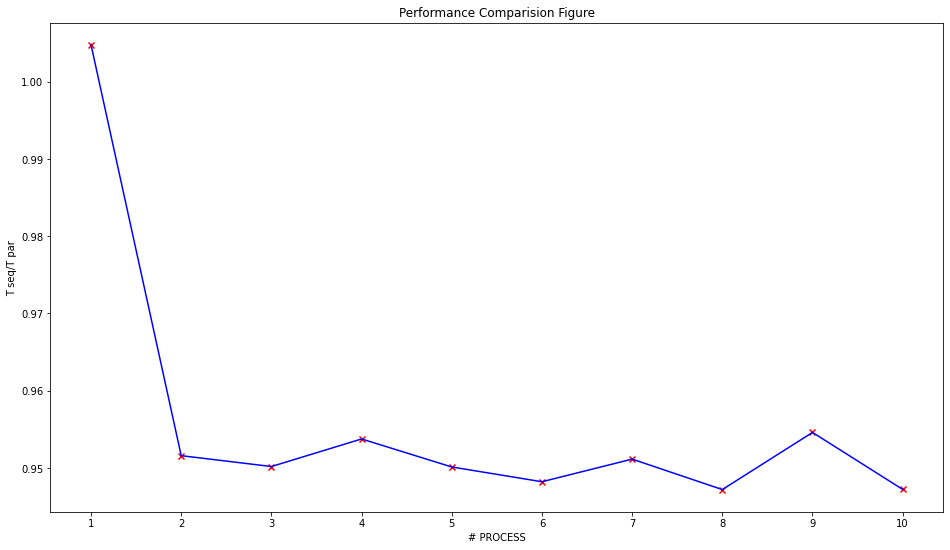

In [75]:
import matplotlib.pyplot as plt
X,Y = zip(*t_par)
X = list(X)
Y = [t_seq/y for y in Y]
plt.figure(figsize=(16,9))
plt.title('Performance Comparision Figure')
plt.xlabel('# PROCESS')
plt.ylabel('T seq/T par')
plt.xticks(X,X)
plt.scatter(X,Y,c='r',marker='x')
plt.plot(X,Y,'b')

In [80]:
print(os.cpu_count())

2
